<a href="https://colab.research.google.com/github/vdllarch93/jupyter-notebook-introduction-data-science-intro-000/blob/master/PyDev_Final_Project_(Vlad_Llarch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Analysis of Wine Reviews and Quality

## Importing the Necessary Modules and Stacking the Datasets

In [3]:
#Importing Necessary Modules and Stacking the Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

wine_reviews1 = pd.read_csv('gdrive/My Drive/PyDev Final Project/winemag-data-130k-v2.csv')
wine_reviews2 = pd.read_csv('gdrive/My Drive/PyDev Final Project/winemag-data_first150k.csv')

all_wine_reviews_full = pd.concat([wine_reviews1 , wine_reviews2], sort=False)

#Excluding Where Price Is Null
all_wine_reviews = all_wine_reviews_full[np.logical_not(np.isnan(all_wine_reviews_full['price']))]


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Running A Few Diagnostics on the Full Dataset

In [10]:
#What Fields Are There
cols = all_wine_reviews.columns
for idx, col in enumerate(cols):
  print(idx+1, col)
  
print('================================')
  
#What Are The Different Field Types
print(all_wine_reviews.dtypes)

print('================================')

#Are There Any Wines Reviewed Multiple Times
all_wine_reviews[['title' , 'points']].groupby('title').count().sort_values(by='points',ascending=False)

1 Unnamed: 0
2 country
3 description
4 designation
5 points
6 price
7 province
8 region_1
9 region_2
10 taster_name
11 taster_twitter_handle
12 title
13 variety
14 winery
15 region
16 price_range
Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
region                    object
price_range               object
dtype: object


,points
title,
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),11
Korbel NV Brut Sparkling (California),9
Segura Viudas NV Extra Dry Sparkling (Cava),8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros),7
Ruinart NV Brut Rosé (Champagne),7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava),7
Bailly-Lapierre NV Brut (Crémant de Bourgogne),6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley),6
Korbel NV Sweet Rosé Sparkling (California),6


# Running A Few Analyses

## What Country Has The Best Wine

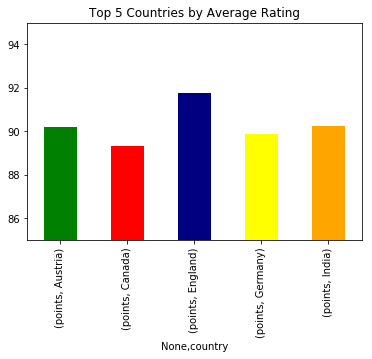

In [5]:
#Collapsing Dataset To Be By Country and Wine Instead of Country, Wine, and Review
avg_review_by_countrywine = all_wine_reviews[['country' , 'title' , 'points']].groupby(['country' , 'title']).mean()

#Now Calculating Average Wine Review by Country To See Where The Best Wine Comes From
avg_review_by_country = avg_review_by_countrywine.groupby('country').mean().sort_values(by = 'points',ascending=False).head(5)

avg_review_by_country.groupby(['country']).mean().unstack().plot(kind='bar',title = 'Top 5 Countries by Average Rating',legend=False,ylim=(85,95),color=['green' , 'red' , 'navy' , 'yellow' , 'orange'])
plt.show()

## What Region Has The Best Wine

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


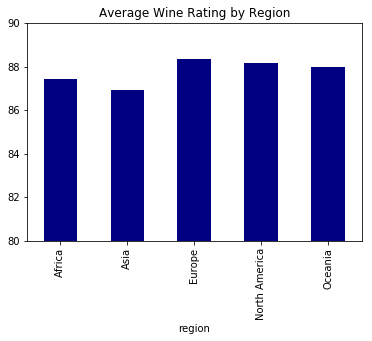

In [6]:
#Mapping Countries to Their Respective Regions
region_dict = {
     'Albania'                  : 'Europe'
    ,'Argentina'                : 'South America'
    ,'Armenia'                  : 'Asia'
    ,'Australia'                : 'Oceania'
    ,'Austria'                  : 'Europe'
    ,'Bosnia and Herzegovina'   : 'Europe'
    ,'Brazil'                   : 'South America'
    ,'Bulgaria'                 : 'Europe'
    ,'Canada'                   : 'North America'
    ,'Chile'                    : 'South America'
    ,'China'                    : 'Asia'
    ,'Croatia'                  : 'Europe'
    ,'Cyprus'                   : 'Europe'
    ,'Czech Republic'           : 'Europe'
    ,'Egypt'                    : 'Africa'
    ,'England'                  : 'Europe'
    ,'France'                   : 'Europe'
    ,'Georgia'                  : 'Asia'
    ,'Germany'                  : 'Europe'
    ,'Greece'                   : 'Europe'
    ,'Hungary'                  : 'Europe'
    ,'India'                    : 'Asia'
    ,'Israel'                   : 'Europe'
    ,'Italy'                    : 'Europe'
    ,'Japan'                    : 'Asia'
    ,'Lebanon'                  : 'Europe'
    ,'Lithuania'                : 'Europe'
    ,'Luxembourg'               : 'Europe'
    ,'Macedonia'                : 'Europe'
    ,'Mexico'                   : 'North America'
    ,'Moldova'                  : 'Europe'
    ,'Montenegro'               : 'Europe'
    ,'Morocco'                  : 'Africa'
    ,'New Zealand'              : 'Oceania'
    ,'Peru'                     : 'South America'
    ,'Portugal'                 : 'Europe'
    ,'Romania'                  : 'Europe'
    ,'Serbia'                   : 'Europe'
    ,'Slovakia'                 : 'Europe'
    ,'Slovenia'                 : 'Europe'
    ,'South Africa'             : 'Africa'
    ,'South Korea'              : 'Asia'
    ,'Spain'                    : 'Europe'
    ,'Switzerland'              : 'Europe'
    ,'Tunisia'                  : 'North America'
    ,'Turkey'                   : 'Europe'
    ,'US'                       : 'North America'
    ,'US-France'                : 'North America'
    ,'Ukraine'                  : 'Europe'
    ,'Uruguay'                  : 'South America'
}

all_wine_reviews['region'] = all_wine_reviews['country'].map(region_dict)

avg_review_by_region = all_wine_reviews[['region' , 'points']].groupby('region').mean().sort_values(by = 'points',ascending=False).head(5)

avg_review_by_region.groupby(['region']).mean().plot(kind='bar',title = 'Average Wine Rating by Region',legend=False,ylim=(80,90),color='navy')
plt.show()

## Are More Expensive Wines Truly 'Better'?

### by Price Bucket

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


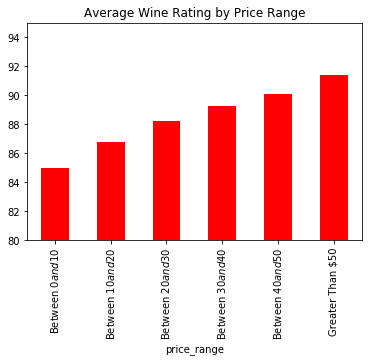

In [7]:
#Creating Price Buckets
conditions = [
     (all_wine_reviews['price'] <= 10),
     (all_wine_reviews['price'] >= 10) & (all_wine_reviews['price'] <= 20),
     (all_wine_reviews['price'] >= 20) & (all_wine_reviews['price'] <= 30),
     (all_wine_reviews['price'] >= 30) & (all_wine_reviews['price'] <= 40),
     (all_wine_reviews['price'] >= 40) & (all_wine_reviews['price'] <= 50),
     (all_wine_reviews['price'] > 50)
    ]

choices = ['Between $0 and $10' , 'Between $10 and $20' , 'Between $20 and $30' , 'Between $30 and $40' , 'Between $40 and $50' , 'Greater Than $50']

#For Wines Without Prices, Flagging as 'No Price Available' For Later Exclusion
all_wine_reviews['price_range'] = np.select(conditions, choices,default = 'No Price Available')

#Excluding Null Price Values
avg_rating_by_winepricerange = all_wine_reviews[all_wine_reviews['price_range'] != 'No Price Available'][['price_range' , 'title' , 'points']].groupby(['price_range' , 'title']).mean()

#Calculating Average Review by Price Range
avg_review_by_pricerange = avg_rating_by_winepricerange.groupby('price_range').mean().sort_values(by = 'points',ascending=False)

avg_review_by_pricerange.groupby(['price_range']).mean().plot(kind='bar',title = 'Average Wine Rating by Price Range',legend=False,ylim=(80,95),color='red')
plt.show()

### Scatter Plot of Price and Ratings

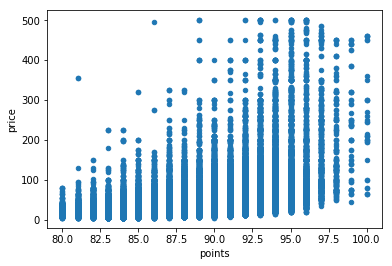

In [8]:
all_wine_reviews[all_wine_reviews['price'] <= 500].plot(kind="scatter",x="points",y="price")

## Top 5 'Best Value' Wines by Country

In [9]:
#Defining Function - In the event you're looking for a wine from a specific region and price keyword args in the event you wanna ball out (or you're on a budget)
def value_wines_by_country(country,upper_limit=10000,lower_limit=0):
  
  #Limiting To Wines In the Country of Interest
  all_wine_reviews_lim = all_wine_reviews[(all_wine_reviews['country'] == f'{country}') & (all_wine_reviews['price'] <= upper_limit) & (all_wine_reviews['price'] >= lower_limit)]
  
  if all_wine_reviews_lim.empty == True:
        print('Wine Review Data for Country of Interest Not Found. Please Try Another Country')
  
  else:
        #Calculating the Average Price / Rating of Wines
        all_wine_reviews_lim = all_wine_reviews_lim[['title' , 'price' , 'points']].groupby('title').mean()
  
        #Calculating the 'Value' Purchases (i.e., most bang / points for your buck)
        all_wine_reviews_lim['value'] = all_wine_reviews_lim['points'] / all_wine_reviews_lim['price']
  
        #Displayig the Top 5
        return print(all_wine_reviews_lim.sort_values(by='value',ascending = False).head(5))

value_wines_by_country('Argentina',lower_limit=5)



                                               price  points      value
title                                                                  
Zamarro 2009 Malbec-Bonarda (Mendoza)            5.0      84  16.800000
Toca Diamonte 2010 Malbec (Mendoza)              5.0      80  16.000000
Terrenal 2013 Estate Bottled Malbec (Mendoza)    5.0      80  16.000000
Funky Llama 2008 Chardonnay (Mendoza)            6.0      85  14.166667
Funky Llama 2009 Malbec (Mendoza)                6.0      85  14.166667
